In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


E:\Users\fauzanhikmahramadhan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


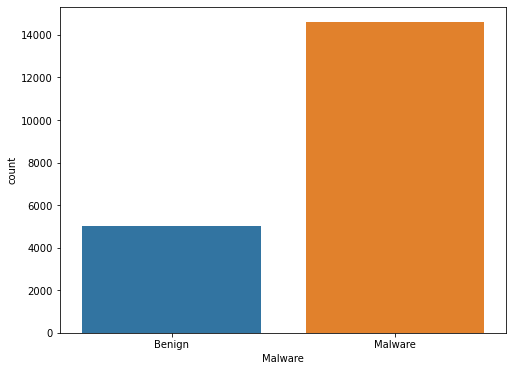

In [2]:
data = pd.read_csv('dataset_malwares.csv')
used_data = data.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

plt.figure(figsize=(8, 6))
ax=sns.countplot(data['Malware'])
ax.set_xticklabels(['Benign', 'Malware'])
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['Malware'], test_size=0.2, random_state=0)

In [5]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [6]:
y_pred = rfc.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97      1004
     Malware       0.99      1.00      0.99      2919

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



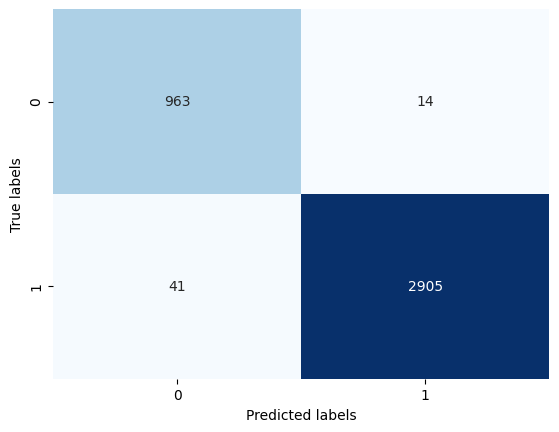

In [10]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [17]:
score = str('{:.2f}'.format(accuracy_score(y_test,y_pred)*100)) + " %"
print(score)

98.60 %


In [9]:
from platform import python_version

print(python_version())

3.8.5


<ipython-input-3-3b700285a262>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Benign', 'Malware'])
Exception in Tkinter callback
Traceback (most recent call last):
  File "E:\Users\fauzanhikmahramadhan\Anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-3-3b700285a262>", line 67, in ML
    sns.countplot(df['Malware'], ax=ax)
NameError: name 'df' is not defined
E:\Users\fauzanhikmahramadhan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


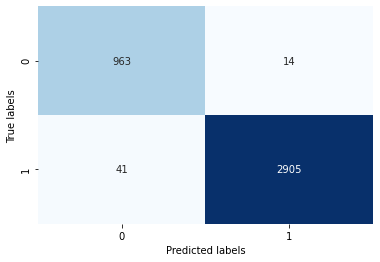

In [3]:
# PAGE MACHINE LEARNING

# PAGE MACHINE LEARNING

from tkinter import *
from tkinter.filedialog import askopenfilename
import csv
import os
from tkinter import ttk
import time
import pandas as pd
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tkinter.messagebox as tkmessagebox

gui = Tk()
width_value = gui.winfo_screenwidth()
height_value = gui.winfo_screenheight()
gui.title('Machine Learning GUI')
gui.geometry('{}x{}+0+0'.format(width_value,height_value))
gui.rowconfigure(0, weight=0)

def data(): # Upload File Data CSV ke Tkinter
    global filename
    filename = askopenfilename(initialdir='C:\\',title = "Select file")
    e1.delete(0, END)
    e1.insert(0, filename)
    #e1.config(text=filename)
    #print(filename)
    global df
    global used_data
    try:
        df = pd.read_csv(filename)
        used_data = df.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)
    except ValueError:
        tkmessagebox.showerror("Information", "Format file yang dimasukkan salah!")
        return None
    except FileNotFoundError:
        tkmessagebox.showerror("Information", "Tidak ada file seperti {}".format(filename))
        return None
    clear_data()
    file['column'] = list(used_data.columns)
    file['show'] = "headings"
    for column in file['columns']:
        file.heading(column, text=column)
    df_rows = used_data.to_numpy().tolist()
    for row in df_rows:
        file.insert("", "end", values=row)
    return None
    
    
def clear_data():
    file.delete(*file.get_children())

def ML():
    l2=Label(hasil_box, text='Pembagian Data:')
    l2.grid(row=0, column=0, sticky='ns', pady=20, padx=10)
    f = Figure(figsize=(10,4), dpi=70)
    ax = f.subplots()
    ax.set_xticklabels(['Benign', 'Malware'])
    sns.countplot(df['Malware'], ax=ax)
    canvas = FigureCanvasTkAgg(f, master=hasil_box)
    canvas.draw()
    canvas.get_tk_widget().grid(row=0, column=1, sticky='n', rowspan=4)
#     toolbar = NavigationToolbar2Tk(canvas,gui)
#     canvas._tkcanvas.grid(column=3, row=1)
    X_train, X_test, y_train, y_test = train_test_split(used_data, df['Malware'], test_size=0.2, random_state=0)
    rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['Benign', 'Malware'])
#     l3=Label(hasil_box, textvariable=report)
#     l3.grid(row=1, column=0, sticky='w', pady=20, padx=10)
    score = str('{:.2f}'.format(accuracy_score(y_test,y_pred)*100)) + " %"
    var = StringVar()
    var.set(score)
    l5=Label(hasil_box, text='Confusion Matrix Data: ')
    l5.grid(row=6, column=0, sticky='ns', pady=20, padx=10)
    f2 = Figure(figsize=(10,4), dpi=70)
    ax2 = f2.subplots()
    ax2=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
    ax2.set_xlabel('Predicted labels')
    ax2.set_ylabel('True labels')
    canvas2 = FigureCanvasTkAgg(f2, master=hasil_box)
    canvas2.draw()
    canvas2.get_tk_widget().grid(row=6, column=1, sticky='ns', rowspan=4, pady=10)
    l3=Label(hasil_box, text='Hasil Akurasi Random Forest: ')
    l3.grid(row=10, column=0, sticky='w', pady=20, padx=10)
    l4=Label(hasil_box, textvariable=var)
    l4.grid(row=10, column=1, sticky='w', pady=20, padx=10)
    
# INPUT DATAFRAME
l1=Label(gui, text='Select Data File')
l1.grid(row=0, column=0, sticky='E', pady=20, padx=10)

e1 = Entry(gui,text='')
e1.grid(row=0, column=1, sticky='W', ipadx=100)

Button(gui,text='open', command=data).grid(row=0, column=2, sticky="W", ipadx=10)

# TAMPILAN DATAFRAME
file_box = LabelFrame(gui,text="dataframe") 
file_box.grid(ipadx=350, ipady=300, padx=10, row=1, columnspan=3)
file = ttk.Treeview(file_box)
file.place(relheight=1, relwidth=1)
filescrolly = Scrollbar(file_box, orient="vertical", command=file.yview)
filescrollx = Scrollbar(file_box, orient="horizontal", command=file.xview)
file.configure(xscrollcommand=filescrollx.set, yscrollcommand=filescrolly.set)
filescrollx.pack(side='bottom', fill='x')
filescrolly.pack(side='right', fill='y')

# PROGRESS BAR
progress_bar = ttk.Progressbar(orient = 'horizontal', length=765, mode='determinate')
progress_bar.grid(row=2, columnspan=3, pady = 10)

# BUTTON PROSES
proses = Button(gui, text='Proses', command=ML)
proses.grid(row=3, columnspan=3, ipadx=20)

# TAMPILAN HASIL PROSES MACHINE LEARNING
hasil_box = LabelFrame(gui,text="Hasil") 
hasil_box.grid(ipadx=500, ipady=400, row=0, column=3, rowspan=10, sticky='NSEW')
hasil_box.rowconfigure(0, weight=0)
hasil_box.rowconfigure(1, weight=0)

gui.mainloop()

In [113]:
from tkinter import *
import tkinter.messagebox as tkMessageBox
import sqlite3

root = Tk()
root.title("Python: Malware Detection")
 
width = 640
height = 480
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x = (screen_width/2) - (width/2)
y = (screen_height/2) - (height/2)
root.geometry("%dx%d+%d+%d" % (width, height, x, y))
root.resizable(0, 0)


#=======================================VARIABLES=====================================
USERNAME = StringVar()
PASSWORD = StringVar()
FIRSTNAME = StringVar()
LASTNAME = StringVar()

#=======================================METHODS=======================================
def Database():
    global conn, cursor
    conn = sqlite3.connect("db_member.db")
    cursor = conn.cursor()
    cursor.execute("CREATE TABLE IF NOT EXISTS `member` (mem_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, username TEXT, password TEXT, firstname TEXT, lastname TEXT)")


def Exit():
    result = tkMessageBox.askquestion('System', 'Are you sure you want to exit?', icon="warning")
    if result == 'yes':
        root.destroy()


def LoginForm():
    global LoginFrame, lbl_result1
    LoginFrame = Frame(root)
    LoginFrame.pack(side=TOP, pady=80)
    
    lbl_username = Label(LoginFrame, text="Username:", font=('arial', 25), bd=18)
    lbl_username.grid(row=1)
    lbl_password = Label(LoginFrame, text="Password:", font=('arial', 25), bd=18)
    lbl_password.grid(row=2)
    lbl_result1 = Label(LoginFrame, text="", font=('arial', 18))
    lbl_result1.grid(row=3, columnspan=2)
    username = Entry(LoginFrame, font=('arial', 20), textvariable=USERNAME, width=15)
    username.grid(row=1, column=1)
    password = Entry(LoginFrame, font=('arial', 20), textvariable=PASSWORD, width=15, show="*")
    password.grid(row=2, column=1)
    btn_login = Button(LoginFrame, text="Login", font=('arial', 18), width=35, command=Login)
    btn_login.grid(row=4, columnspan=2, pady=20)
    
    lbl_text = Label(LoginFrame, text = "Are you have account?", font=('arial', 12))
    lbl_text.grid(row=5, sticky=W, column=0)
    lbl_register = Label(LoginFrame, text="No, Creat an account", fg="Blue", font=('arial', 12))
    lbl_register.grid(row=5, sticky=W, column=1)
    lbl_register.bind('<Button-1>', ToggleToRegister)

def RegisterForm():
    global RegisterFrame, lbl_result2
    RegisterFrame = Frame(root)
    RegisterFrame.pack(side=TOP, pady=40)
    
    lbl_username = Label(RegisterFrame, text="Username:", font=('arial', 18), bd=18)
    lbl_username.grid(row=1)
    lbl_password = Label(RegisterFrame, text="Password:", font=('arial', 18), bd=18)
    lbl_password.grid(row=2)
    lbl_firstname = Label(RegisterFrame, text="Firstname:", font=('arial', 18), bd=18)
    lbl_firstname.grid(row=3)
    lbl_lastname = Label(RegisterFrame, text="Lastname:", font=('arial', 18), bd=18)
    lbl_lastname.grid(row=4)
    lbl_result2 = Label(RegisterFrame, text="", font=('arial', 18))
    lbl_result2.grid(row=5, columnspan=2)
    
    username = Entry(RegisterFrame, font=('arial', 20), textvariable=USERNAME, width=15)
    username.grid(row=1, column=1)
    password = Entry(RegisterFrame, font=('arial', 20), textvariable=PASSWORD, width=15, show="*")
    password.grid(row=2, column=1)
    firstname = Entry(RegisterFrame, font=('arial', 20), textvariable=FIRSTNAME, width=15)
    firstname.grid(row=3, column=1)
    lastname = Entry(RegisterFrame, font=('arial', 20), textvariable=LASTNAME, width=15)
    lastname.grid(row=4, column=1)
    btn_login = Button(RegisterFrame, text="Register", font=('arial', 18), width=35, command=Register)
    btn_login.grid(row=6, columnspan=2, pady=20)
    
    lbl_text = Label(RegisterFrame, text="Do you have account?", font=('arial', 12))
    lbl_text.grid(row=7, sticky=W, column= 0)
    lbl_login = Label(RegisterFrame, text="Yes, I have", fg="Blue", font=('arial', 12))
    lbl_login.grid(row=7, sticky=W, column= 1)
    lbl_login.bind('<Button-1>', ToggleToLogin)

def main():
    global RegisterFrame, lbl_result2
    MainFrame = Frame(root)
    MainFrame.pack(side=TOP, pady=40)

def ToggleToLogin(event=None):
    RegisterFrame.destroy()
    LoginForm()

def ToggleToRegister(event=None):
    LoginFrame.destroy()
    RegisterForm()
    
def ToggleToMain(event=None):
    LoginFrame.destroy()
    main()

def Register():
    Database()
    if USERNAME.get == "" or PASSWORD.get() == "" or FIRSTNAME.get() == "" or LASTNAME.get == "":
        lbl_result2.config(text="Please complete the required field!", fg="orange")
    else:
        cursor.execute("SELECT * FROM `member` WHERE `username` = ?", (USERNAME.get(),))
        if cursor.fetchone() is not None:
            lbl_result2.config(text="Username is already taken", fg="red")
        else:
            cursor.execute("INSERT INTO `member` (username, password, firstname, lastname) VALUES(?, ?, ?, ?)", (str(USERNAME.get()), str(PASSWORD.get()), str(FIRSTNAME.get()), str(LASTNAME.get())))
            conn.commit()
            USERNAME.set("")
            PASSWORD.set("")
            FIRSTNAME.set("")
            LASTNAME.set("")
            lbl_result2.config(text="Successfully Created!", fg="black")
        cursor.close()
        conn.close()
def Login():
    Database()
    if USERNAME.get == "" or PASSWORD.get() == "":
        lbl_result1.config(text="Please complete the required field!", fg="orange")
    else:
        cursor.execute("SELECT * FROM `member` WHERE `username` = ? and `password` = ?", (USERNAME.get(), PASSWORD.get()))
        if cursor.fetchone() is not None:
            lbl_result1.config(text="You Successfully Login", fg="blue")
            ToggleToMain()
        else:
            lbl_result1.config(text="Invalid Username or password", fg="red")
LoginForm()

#========================================MENUBAR WIDGETS==================================
menubar = Menu(root)
filemenu = Menu(menubar, tearoff=0)
filemenu.add_command(label="Exit", command=Exit)
menubar.add_cascade(label="File", menu=filemenu)
root.config(menu=menubar)


#========================================INITIALIZATION===================================
if __name__ == '__main__':
    root.mainloop()
   


# YANG DI BAWAH KODINGAN COBA-COBA, BELUM BAGUS

In [20]:
# from tkinter import *
# from tkinter.ttk import *
# from tkinter.filedialog import askopenfile 
# import time

# ws = Tk()
# ws.title('Deteksi Malware menggunakan Machine Learning')
# ws.geometry('400x200') 


# def open_file():
#     file_path = askopenfile(mode='r', filetypes=[('csv', '*csv')])
#     if file_path is not None:
#         pass


# def uploadFiles():
#     pb1 = Progressbar(
#         ws, 
#         orient=HORIZONTAL, 
#         length=300, 
#         mode='determinate'
#         )
#     pb1.grid(row=4, columnspan=3, pady=20)
#     for i in range(5):
#         ws.update_idletasks()
#         pb1['value'] += 20
#         time.sleep(1)
#     pb1.destroy()
#     Label(ws, text='File Uploaded Successfully!', foreground='green').grid(row=4, columnspan=3, pady=10)
        
    
    
# adhar = Label(
#     ws, 
#     text='Upload File Harus Dalam Bentuk File CSV'
#     )
# adhar.grid(row=0, column=0, padx=10)

# adharbtn = Button(
#     ws, 
#     text ='Choose File', 
#     command = lambda:open_file()
#     ) 
# adharbtn.grid(row=0, column=1)

# upld = Button(
#     ws, 
#     text='Upload Files', 
#     command=uploadFiles
#     )
# upld.grid(row=3, columnspan=3, pady=10)



# ws.mainloop()

In [75]:

# # Python program to create
# # a file explorer in Tkinter
  
# # import all components
# # from the tkinter library
# from tkinter import *
  
# # import filedialog module
# from tkinter import filedialog
  
# # Function for opening the
# # file explorer window
# def browseFiles():
#     filename = filedialog.askopenfilename(initialdir = "/",
#                                           title = "Select a File",
#                                           filetypes = (("CSV Files",
#                                                         "*.csv*"),
#                                                        ("all files",
#                                                         "*.*")))
      
#     # Change label contents
#     label_file_explorer.configure(text="File Opened: "+filename)
      
      
# def inputData():
#     data = pd.read_csv('dataset_malwares.csv')

# def draw_table(data):
#     columns = list(data.columns)
    

# # Create the root window
# window = Tk()
  
# # Set window title
# window.title('File Explorer')
  
# # Set window size
# window.geometry("700x500")
  
# #Set window background color
# window.config(background = "white")
  
# # Create a File Explorer label
# label_file_explorer = Label(window,
#                             text = "File Explorer using Tkinter",
#                             width = 100, height = 4,
#                             fg = "blue")
  
      
# button_explore = Button(window,
#                         text = "Browse Files",
#                         command = browseFiles)
  
# button_exit = Button(window,
#                      text = "Exit",
#                      command = exit)

# button_df = Button(window,
#                    text = "DataFrame",
#                    command = inputData)
  
# # Grid method is chosen for placing
# # the widgets at respective positions
# # in a table like structure by
# # specifying rows and columns
# label_file_explorer.grid(column = 1, row = 1)
  
# button_explore.grid(column = 1, row = 2)
  
# button_exit.grid(column = 1,row = 3)

# button_df.grid(column = 1,row=4)
  
# # Let the window wait for any events
# window.mainloop()

In [111]:
# from tkinter import *
# from tkinter.filedialog import askopenfilename
# import csv
# import os
# from tkinter import ttk
# import time

# gui = Tk()
# width_value = gui.winfo_screenwidth()
# height_value = gui.winfo_screenheight()
# # gui.title('Machine Learning GUI')
# gui.geometry('{}x{}+0+0'.format(width_value,height_value))
# # gui.attributes('-fullscreen',True)

# progress_bar = ttk.Progressbar(orient = 'horizontal', length=600, mode='determinate')
# progress_bar.grid(row=150, columnspan=3, pady =10)


# def data():
#     global filename
#     filename = askopenfilename(initialdir='C:\\',title = "Select file")
#     e1.delete(0, END)
#     e1.insert(0, filename)
#     #e1.config(text=filename)
#     #print(filename)



#     import pandas as pd
#     global file1

#     file1 = pd.read_csv(filename)

#     global col
#     col = list(file1.head(0))
#     #print(col)

#     for i in range(len(col)):
#         box1.insert(i+1, col[i])

# def X_values():

#     values = [box1.get(idx) for idx in box1.curselection()]
#     for i in range(len(list(values))):
#         box2.insert(i+1, values[i])
#         box1.selection_clear(i+1, END)
#     X_values.x1=[]
#     for j in range(len(values)):X_values.x1.append(j)

#     global x_size
#     x_size = len(X_values.x1)
#     print(x_size)


#     print(X_values.x1)



# def y_values():
#     values= [box1.get(idx) for idx in box1.curselection()]
#     for i in range(len(list(values))):
#         box3.insert(i+1, values[i])
#     y_values.y1=[]
#     for j in range(len(values)):y_values.y1.append(j)


#     print(y_values.y1)


# def clear():
#     pass

# def sol():
#     progress()
   
#     from sklearn.model_selection import cross_val_score,train_test_split,KFold
#     from sklearn.neighbors import KNeighborsClassifier
#     from sklearn.svm import SVC
#     from sklearn.linear_model import LogisticRegression
#     from sklearn.tree import DecisionTreeClassifier
#     from sklearn.naive_bayes import GaussianNB
#     from matplotlib import pyplot as plt
   



#     X = file1.iloc[:,X_values.x1].values
#     y = file1.iloc[:,y_values.y1].values

#     y = y.reshape((-1,))

#     from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#     le =LabelEncoder()
#     hotlist =[]
    
#     for i in range(X.shape[1]):
#         if isinstance(X[1,i], str):
#             X[:,i] = le.fit_transform(X[:,i])
#             hotlist.append(i)
#             #print('hello')
#     #print(X)
#     #print(hotlist)

#     onehot = OneHotEncoder(categorical_features=hotlist)
#     X = onehot.fit_transform(X).toarray()

#     from sklearn.preprocessing import StandardScaler

#     sc = StandardScaler()

#     X = sc.fit_transform(X) 

  
#     kfold=KFold(10,random_state=7)
#     models=[]
#     models.append(("KNN",KNeighborsClassifier()))
#     models.append(("NB",GaussianNB()))
#     #models.append(("LG",LogisticRegression()))
#     models.append(("Tree",DecisionTreeClassifier()))
#     #models.append(("SVM",SVC()))
#     results=[]
#     names=[]
#     scoring='accuracy'
#     for name,model in models:
# 	    kfold=KFold(n_splits=5,random_state=5) 
# 	    v=cross_val_score(model,X,y,cv=kfold,scoring=scoring)
# 	    results.append(v)
# 	    names.append(name)
# 	    print(name)
# 	    print(v)
#     fig=plt.figure()
#     fig.suptitle('Algorithm Comparison')
#     ax=fig.add_subplot(111)
#     plt.boxplot(results)
#     ax.set_xticklabels(names)
#     plt.show()

#     #stop_progressbar()

# def progress():
#     progress_bar['maximum']=100

#     for i in range(101):
#         time.sleep(0.01)
#         progress_bar['value'] = i
#         progress_bar.update()

#     progress_bar['value'] = 0
# '''
# def start_progressbar():
#     a = progress()
#     a.progress_bar.start()

# def stop_progressbar():
#     a = progress()
#     a.progress_bar.stop()

# def twofunc():
#     progress()
#     sol()
    
# '''

# l1=Label(gui, text='Select Data File')
# l1.grid(row=0, column=0)
# e1 = Entry(gui,text='')
# e1.grid(row=0, column=1)

# Button(gui,text='open', command=data).grid(row=0, column=2)

# df_box = LabelFrame(gui,text="dataframe") 
# df_box.place(height=250, width=500)

# # box1 = Listbox(gui,selectmode='multiple')
# # box1.grid(row=10, column=0, sticky='ew', columnspan=3)

# Button(gui, text='Clear All',command=clear).grid(row=12,column=0)
# Button(gui, text='Solution', command=sol).grid(row=20, column=1)




# # gui.eval('tk::PlaceWindow . center')
# gui.mainloop()